<a href="https://colab.research.google.com/github/kmouleejunhyuk/bigdata_analysist_practical/blob/main/type2_analysing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
#prepare data
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [143]:
PATH ='/gdrive/MyDrive/big_2021/data/official'
SEED = 49

In [144]:
import pandas as pd
import numpy as np
import collections
import sklearn

In [145]:
x_test_o = pd.read_csv(PATH + '/type2/X_test.csv', encoding = 'cp949')
x_train_o = pd.read_csv(PATH + '/type2/X_train.csv', encoding = 'cp949')
y_train_o = pd.read_csv(PATH + '/type2/y_train.csv', encoding = 'cp949')

In [146]:
x_test_raw = x_test_o.copy()
x_train_raw = x_train_o.copy()
y_train_raw = y_train_o.copy()

In [147]:
x_train_raw.shape

(3500, 10)

In [148]:
y_train_raw.shape

(3500, 2)

In [149]:
x_test_raw.shape

(2482, 10)

In [150]:
x_test_raw.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,3500,70900400,22000000,4050000.0,골프,부산본점,13,1.461538,0.789474,26
1,3501,310533100,38558000,48034700.0,농산물,잠실점,90,2.433333,0.369863,3
2,3502,305264140,14825000,30521000.0,가공식품,본 점,101,14.623762,0.083277,3
3,3503,7594080,5225000,NaN,주방용품,부산본점,5,2.000000,0.000000,47
4,3504,1795790,1411200,NaN,수산품,청량리점,3,2.666667,0.125000,8


In [151]:
x_train_raw.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85


In [152]:
y_train_raw.head()

,cust_id,gender
0,0,0
1,1,0
2,2,1
3,3,1
4,4,0


이상치 및 중복값 제거를 용이하게 하기 위해 레이블과 변수 통합

In [153]:
x_train_raw = pd.concat([y_train_raw['gender'], x_train_raw], axis = 1)

In [154]:
x_train_raw.head()

,gender,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,0,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,1,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,1,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,0,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85


이름을 영문으로 치환

In [155]:
mapper = {'총구매액': 'total_purchase', '최대구매액': 'max_purchace', '환불금액': 'refund', '주구매상품': 'main_merch', '주구매지점': 'main_office', '내점일수': 'visit', '내점당구매건수': 'purchace_per_visit', '주말방문비율': 'weekend_visit_ratio', '구매주기': 'purchace_period'}
x_train_raw = x_train_raw.rename(mapper, axis = 1)
x_test_raw = x_test_raw.rename(mapper, axis = 1)

#EDA

In [156]:
x_train_raw['gender'].value_counts()

0    2184
1    1316
Name: gender, dtype: int64

여자가 남자보다 약 2배 많은 데이터, 하지만 과적합하기엔 표본이 많다(레이블 불균형 고려 x)

null과 duplicated 데이터를 확인한다

In [157]:
x_train_raw.isnull().sum()

gender                    0
cust_id                   0
total_purchase            0
max_purchace              0
refund                 2295
main_merch                0
main_office               0
visit                     0
purchace_per_visit        0
weekend_visit_ratio       0
purchace_period           0
dtype: int64

In [158]:
x_test_raw.isnull().sum()

cust_id                   0
total_purchase            0
max_purchace              0
refund                 1611
main_merch                0
main_office               0
visit                     0
purchace_per_visit        0
weekend_visit_ratio       0
purchace_period           0
dtype: int64

In [159]:
x_train_raw.duplicated().sum()

0

x의 환불금액에 null이 있다. 고객 별 환불금액이니 환불 이력이 없다는 의미. 0으로 치환한다.


In [160]:
x_train_raw['refund'].replace(np.nan, 0, inplace = True)
x_train_raw.isnull().sum()

gender                 0
cust_id                0
total_purchase         0
max_purchace           0
refund                 0
main_merch             0
main_office            0
visit                  0
purchace_per_visit     0
weekend_visit_ratio    0
purchace_period        0
dtype: int64

In [161]:
x_test_raw['refund'].replace(np.nan, 0, inplace = True)
x_test_raw.isnull().sum()

cust_id                0
total_purchase         0
max_purchace           0
refund                 0
main_merch             0
main_office            0
visit                  0
purchace_per_visit     0
weekend_visit_ratio    0
purchace_period        0
dtype: int64

cust_id를 제외한 데이터의 분포를 살펴본다

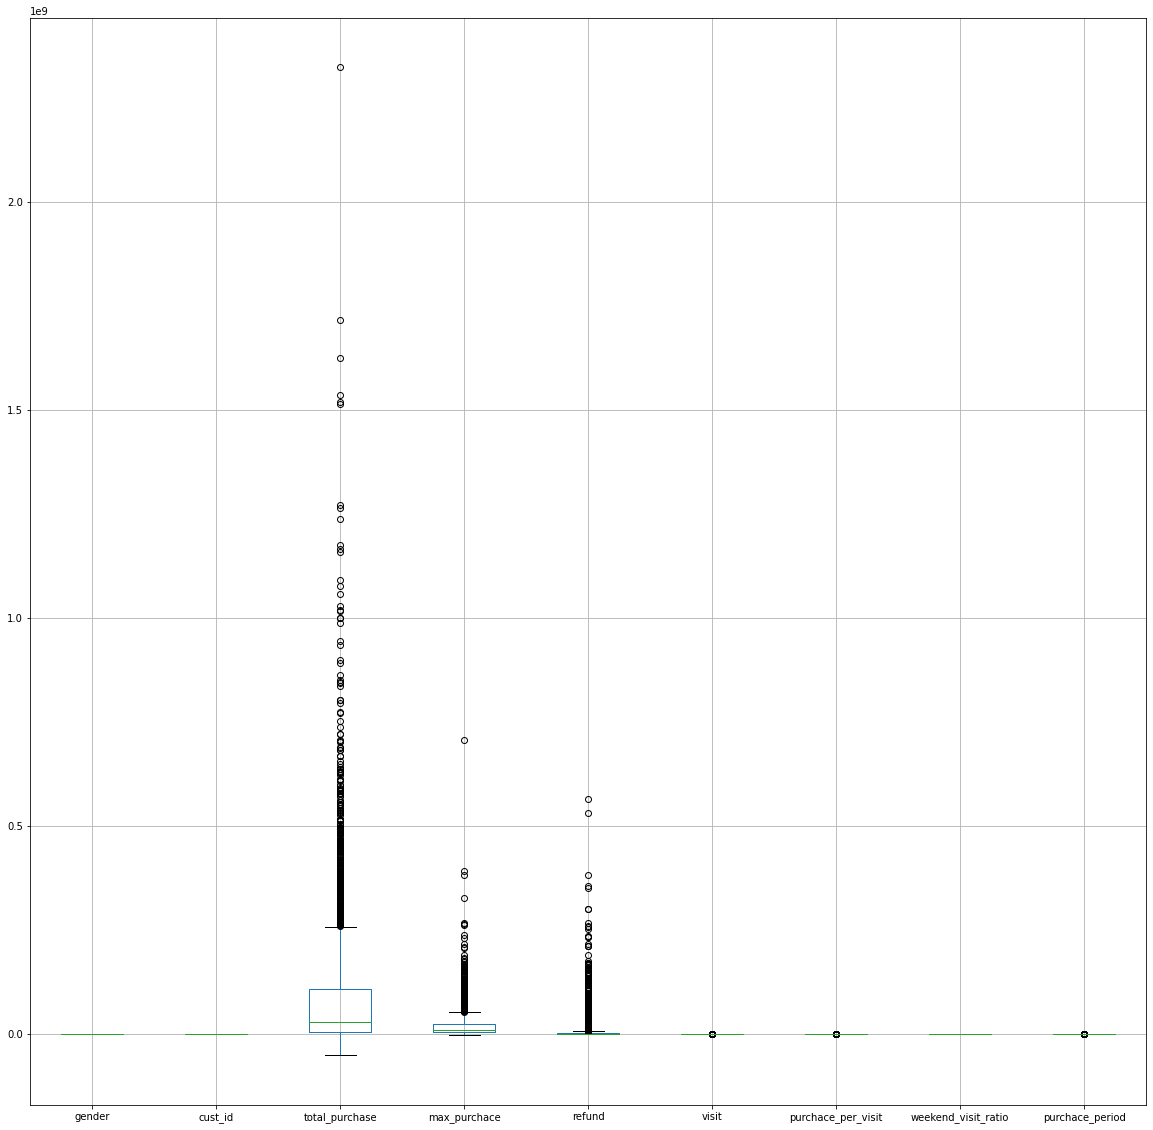

In [162]:
x_train_raw.boxplot(figsize=(20, 20))

총 구매금액이 음수인 사용자는 제거

In [163]:
invalid_index = x_train_raw['total_purchase'] < 0
x_train_raw = x_train_raw[~invalid_index]

In [164]:
x_train_raw.describe()

,gender,cust_id,total_purchase,max_purchace,refund,visit,purchace_per_visit,weekend_visit_ratio,purchace_period
count,3497.000000,3497.00000,3.497000e+03,3.497000e+03,3.497000e+03,3497.000000,3497.000000,3497.000000,3497.000000
mean,0.376323,1748.62139,9.201936e+07,1.965454e+07,8.116796e+06,19.255934,2.835534,0.307344,20.968544
std,0.484532,1010.22432,1.635398e+08,3.198607e+07,2.875541e+07,27.184112,1.912509,0.289827,24.756044
min,0.000000,0.00000,0.000000e+00,5.000000e+03,0.000000e+00,1.000000,1.000000,0.000000,0.000000
25%,0.000000,874.00000,4.770000e+06,2.875000e+06,0.000000e+00,2.000000,1.666667,0.027778,4.000000
50%,0.000000,1749.00000,2.827300e+07,9.834000e+06,0.000000e+00,8.000000,2.333333,0.256410,13.000000
75%,1.000000,2623.00000,1.068040e+08,2.295000e+07,2.576000e+06,25.000000,3.375000,0.448980,28.000000
max,1.000000,3499.00000,2.323180e+09,7.066290e+08,5.637530e+08,285.000000,22.083333,1.000000,166.000000


total_purchase의 IQR를 넘는 이상치는 제거

In [165]:
Q1 = x_train_raw['total_purchase'].quantile(0.25)
Q3 = x_train_raw['total_purchase'].quantile(0.75)
IQR = Q3 - Q1
x_train_raw = x_train_raw[~(x_train_raw['total_purchase'] > (1.5 * Q3))]

refund의 시각적 이상치 제거

In [166]:
x_train_raw = x_train_raw[~(x_train_raw['refund'] > 1.75e+8)]

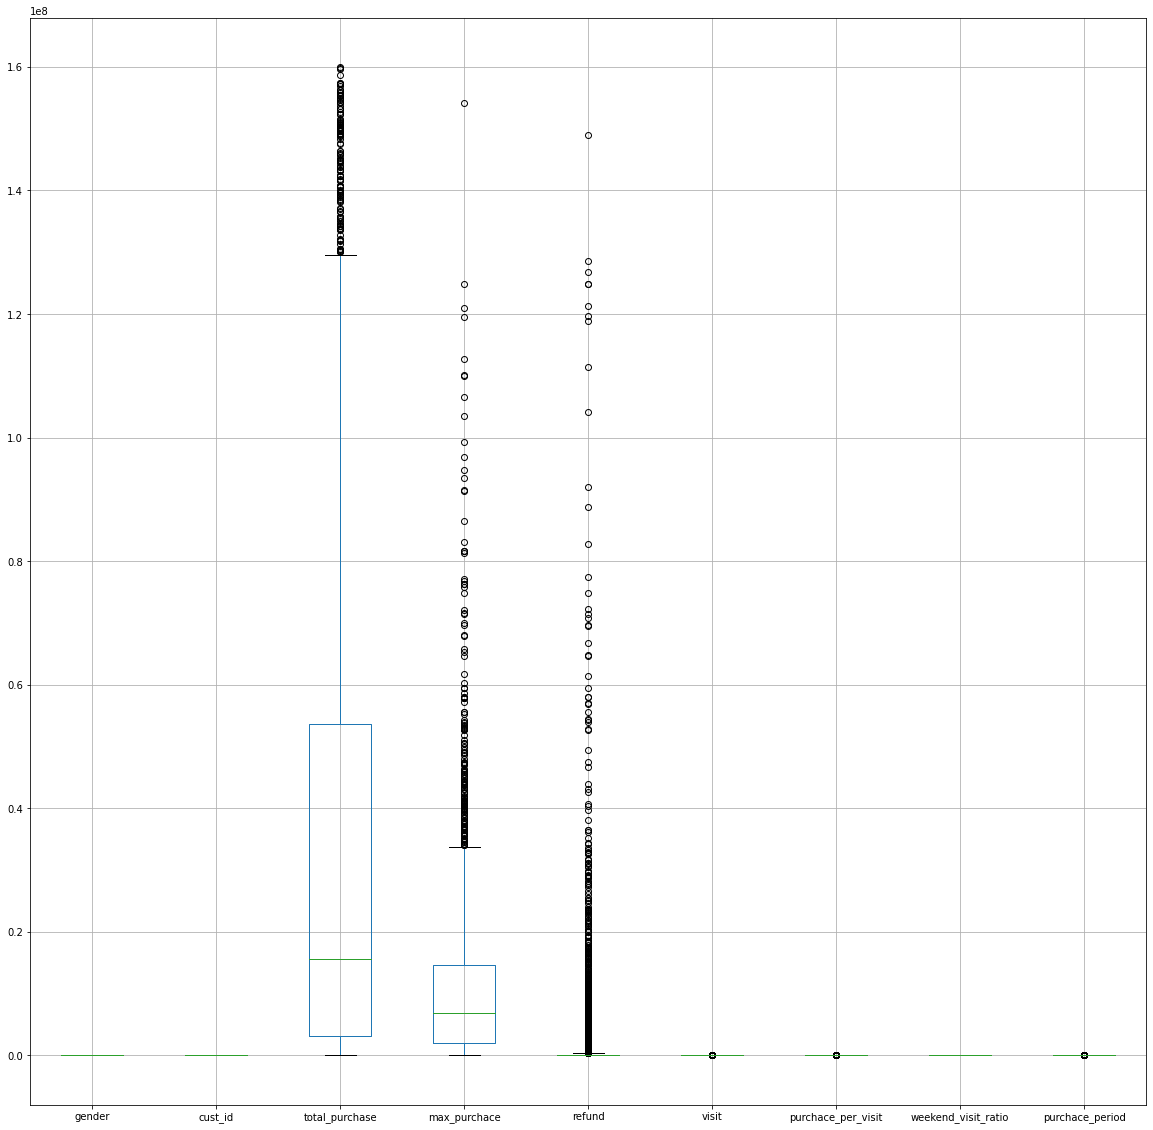

In [167]:
x_train_raw.boxplot(figsize=(20, 20))

상관계수 확인

In [168]:
x_train_raw.corr()

,gender,cust_id,total_purchase,max_purchace,refund,visit,purchace_per_visit,weekend_visit_ratio,purchace_period
gender,1.000000,-0.001349,-0.142451,-0.089917,-0.084031,-0.120665,-0.029419,0.067052,0.003022
cust_id,-0.001349,1.000000,-0.015194,0.003828,0.008175,-0.042428,-0.004443,-0.001786,0.019720
total_purchase,-0.142451,-0.015194,1.000000,0.671705,0.313885,0.604826,0.124758,0.022779,-0.110709
max_purchace,-0.089917,0.003828,0.671705,1.000000,0.413055,0.229128,-0.018843,0.021522,0.002039
refund,-0.084031,0.008175,0.313885,0.413055,1.000000,0.273126,-0.001308,-0.002403,-0.090270
visit,-0.120665,-0.042428,0.604826,0.229128,0.273126,1.000000,0.214806,-0.004990,-0.210926
purchace_per_visit,-0.029419,-0.004443,0.124758,-0.018843,-0.001308,0.214806,1.000000,0.006339,-0.071607
weekend_visit_ratio,0.067052,-0.001786,0.022779,0.021522,-0.002403,-0.004990,0.006339,1.000000,0.002076
purchace_period,0.003022,0.019720,-0.110709,0.002039,-0.090270,-0.210926,-0.071607,0.002076,1.000000


총구매액, 최대구매액이 상관도가 높으나 0.9 이하는 제거하지 않기로 결정.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9dac6bf050>,
      dtype=object)

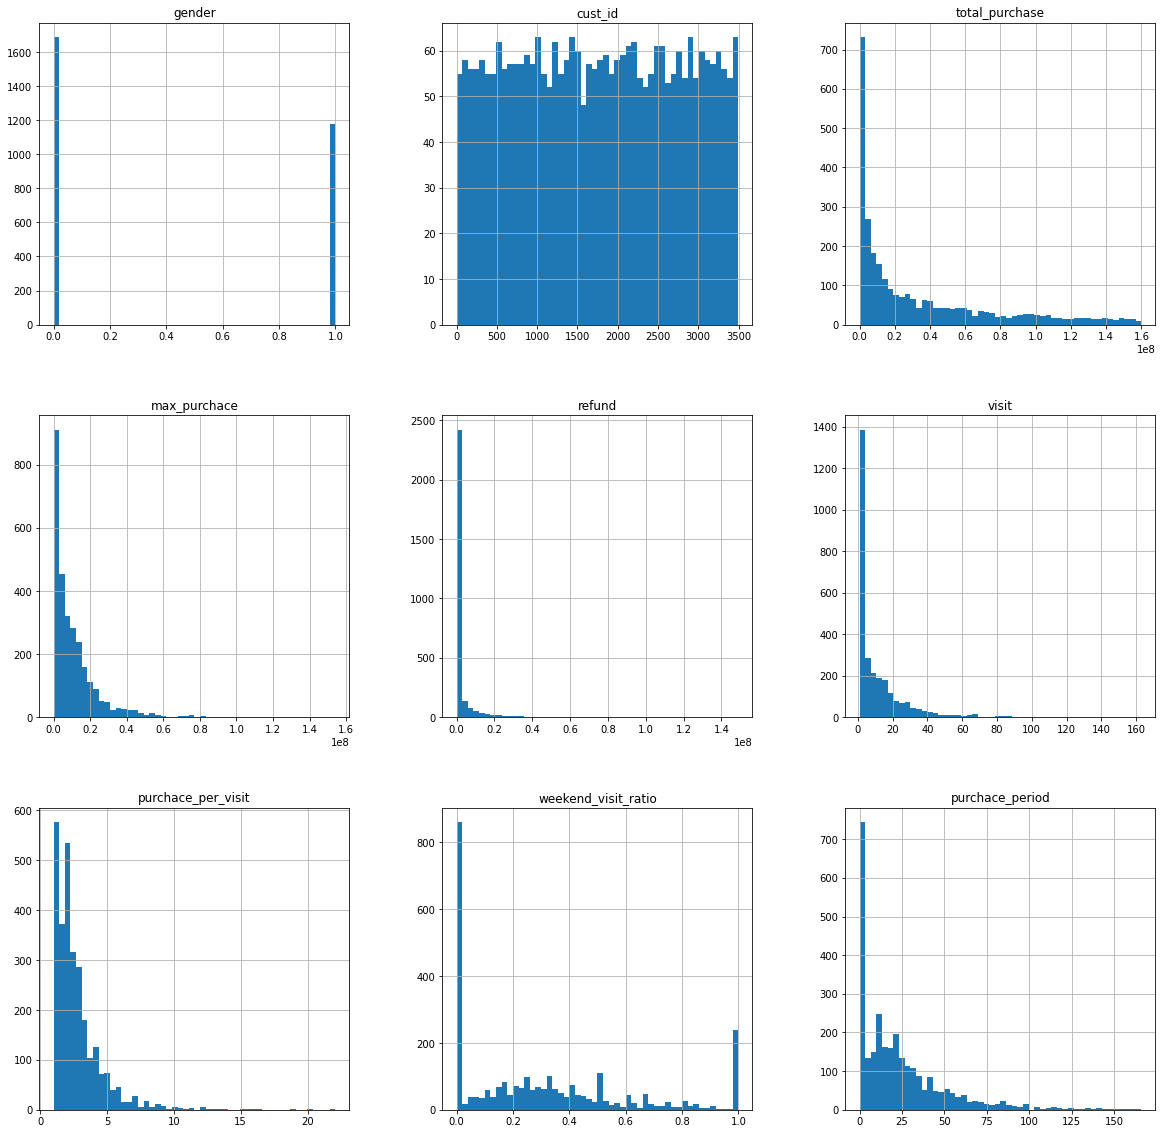

In [169]:
x_train_raw.hist(figsize = (20, 20), bins = 50)

In [170]:
x_train_raw['main_merch'].value_counts()

가공식품      467
기타        430
농산물       255
화장품       222
시티웨어      184
수산품       143
디자이너      100
섬유잡화       96
캐주얼        82
일용잡화       63
명품         62
스포츠        60
골프         58
육류         56
모피/피혁      56
구두         52
남성 캐주얼     52
건강식품       46
차/커피       40
피혁잡화       39
축산가공       34
아동         31
주방용품       30
셔츠         30
젓갈/반찬      29
주방가전       25
남성정장       22
트래디셔널      20
생활잡화       15
주류         13
가구         10
커리어         8
대형가전        7
란제리/내의      7
식기          6
액세서리        5
보석          3
침구/수예       3
통신/컴퓨터      3
소형가전        2
악기          2
남성 트랜디      1
Name: main_merch, dtype: int64

In [171]:
x_train_raw['main_office'].value_counts()

본  점     860
잠실점      406
분당점      372
영등포점     214
부산본점     205
일산점      147
강남점      132
청량리점      76
노원점       75
광주점       74
미아점       60
대전점       50
부평점       45
관악점       37
동래점       36
안양점       26
인천점       21
포항점        9
센텀시티점      6
전주점        5
대구점        5
창원점        4
울산점        4
Name: main_office, dtype: int64

파생변수 창출

In [211]:
is_man = ['스포츠', '골프', '남성 캐주얼', '남성정장', '남성 트렌디', '시티웨어']

In [212]:
x_train_raw['isman'] = [0 if x in is_man else 1 for x in x_train_raw['main_merch']]

In [221]:
x_train_raw['weekend'] = [1 if x >= 0.8 else 0 for x in x_train_raw['weekend_visit_ratio']]

In [222]:
x_train_raw.corr()

,gender,cust_id,total_purchase,max_purchace,refund,visit,purchace_per_visit,weekend_visit_ratio,purchace_period,weekend,isman
gender,1.000000,-0.001349,-0.142451,-0.089917,-0.084031,-0.120665,-0.029419,0.067052,0.003022,0.102007,-0.025931
cust_id,-0.001349,1.000000,-0.015194,0.003828,0.008175,-0.042428,-0.004443,-0.001786,0.019720,-0.004210,-0.003460
total_purchase,-0.142451,-0.015194,1.000000,0.671705,0.313885,0.604826,0.124758,0.022779,-0.110709,-0.191443,0.029623
max_purchace,-0.089917,0.003828,0.671705,1.000000,0.413055,0.229128,-0.018843,0.021522,0.002039,-0.118111,-0.019909
refund,-0.084031,0.008175,0.313885,0.413055,1.000000,0.273126,-0.001308,-0.002403,-0.090270,-0.079442,-0.007380
visit,-0.120665,-0.042428,0.604826,0.229128,0.273126,1.000000,0.214806,-0.004990,-0.210926,-0.176888,0.115754
purchace_per_visit,-0.029419,-0.004443,0.124758,-0.018843,-0.001308,0.214806,1.000000,0.006339,-0.071607,-0.027422,0.176509
weekend_visit_ratio,0.067052,-0.001786,0.022779,0.021522,-0.002403,-0.004990,0.006339,1.000000,0.002076,0.745676,0.014956
purchace_period,0.003022,0.019720,-0.110709,0.002039,-0.090270,-0.210926,-0.071607,0.002076,1.000000,-0.094707,0.001997
weekend,0.102007,-0.004210,-0.191443,-0.118111,-0.079442,-0.176888,-0.027422,0.745676,-0.094707,1.000000,-0.027387


In [224]:
dummy_main_merch = pd.get_dummies(x_train_raw['main_merch'])

In [225]:
x_train_raw = pd.concat([x_train_raw, dummy_main_merch], axis = 1)

In [226]:
x_train_raw = x_train_raw.drop(['main_merch', 'main_office', 'isman', 'purchace_per_visit'], axis = 1)

In [227]:
x_train_raw

,gender,cust_id,total_purchase,max_purchace,refund,visit,weekend_visit_ratio,purchace_period,weekend,가공식품,가구,건강식품,골프,구두,기타,남성 캐주얼,남성 트랜디,남성정장,농산물,대형가전,디자이너,란제리/내의,명품,모피/피혁,보석,생활잡화,섬유잡화,셔츠,소형가전,수산품,스포츠,시티웨어,식기,아동,악기,액세서리,육류,일용잡화,젓갈/반찬,주류,주방가전,주방용품,차/커피,축산가공,침구/수예,캐주얼,커리어,통신/컴퓨터,트래디셔널,피혁잡화,화장품
0,0,0,68282840,11264000,6860000.0,19,0.527027,17,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,2136000,2136000,300000.0,2,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2,3197000,1639000,0.0,2,0.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,3,16077620,4935000,0.0,18,0.318182,16,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,4,29050000,24000000,0.0,2,0.000000,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,1,3494,95835000,81650000,0.0,7,0.111111,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3495,1,3495,3175200,3042900,0.0,1,1.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3496,1,3496,29628600,7200000,6049600.0,8,0.461538,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3497,0,3497,75000,75000,0.0,1,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [230]:
correlation = x_train_raw.corr()

In [236]:
related = [ind for x, ind in zip(correlation['gender'].values, correlation['gender'].index) if abs(x)>0.05]

In [237]:
x_train_selected = x_train_raw[related].copy()

In [242]:
x_train_selected

,gender,total_purchase,max_purchace,refund,visit,weekend_visit_ratio,weekend,골프,남성 캐주얼,남성정장,농산물,디자이너,시티웨어,주방가전,화장품
0,0,68282840,11264000,6860000.0,19,0.527027,0,0,0,0,0,0,0,0,0
1,0,2136000,2136000,300000.0,2,0.000000,0,0,0,0,0,0,0,0,0
2,1,3197000,1639000,0.0,2,0.000000,0,0,1,0,0,0,0,0,0
3,1,16077620,4935000,0.0,18,0.318182,0,0,0,0,0,0,0,0,0
4,0,29050000,24000000,0.0,2,0.000000,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,1,95835000,81650000,0.0,7,0.111111,0,0,0,0,0,0,0,0,0
3495,1,3175200,3042900,0.0,1,1.000000,1,1,0,0,0,0,0,0,0
3496,1,29628600,7200000,6049600.0,8,0.461538,0,0,0,0,0,0,1,0,0
3497,0,75000,75000,0.0,1,0.000000,0,0,0,0,0,0,0,0,0


In [126]:
print(x_train_o.shape[0] - x_train_raw.shape[0])

631


In [127]:
female = x_train_raw[x_train_raw['gender'] == 0]
male = x_train_raw[x_train_raw['gender'] == 1]

In [264]:
diff = female.shape[0] - male.shape[0]
female = female.sample(n = female.shape[0] - diff)
x_train_raw = pd.concat([female, male], axis = 0)
x_train_raw.sample(frac = 1, replace = True).reset_index(drop = True)

,gender,cust_id,total_purchase,max_purchace,refund,visit,purchace_per_visit,weekend_visit_ratio,purchace_period,가공식품,가구,건강식품,골프,구두,기타,남성 캐주얼,남성 트랜디,남성정장,농산물,대형가전,디자이너,란제리/내의,명품,모피/피혁,보석,생활잡화,섬유잡화,셔츠,소형가전,수산품,스포츠,시티웨어,식기,아동,악기,액세서리,육류,일용잡화,젓갈/반찬,주류,주방가전,주방용품,차/커피,축산가공,침구/수예,캐주얼,커리어,통신/컴퓨터,트래디셔널,피혁잡화,화장품,강남점,관악점,광주점,노원점,대구점,대전점,동래점,미아점,본 점,부산본점,부평점,분당점,센텀시티점,안양점,영등포점,울산점,인천점,일산점,잠실점,전주점,창원점,청량리점,포항점
0,1,2385,2025000,1944000,0.0,1,2.000000,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,842,3418570,1958000,0.0,2,8.000000,0.625000,113,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1945,50600000,50600000,0.0,1,1.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,475,17482650,8064000,0.0,12,4.416667,0.452830,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1628,319000,225000,0.0,1,3.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2355,1,3109,2145000,2145000,0.0,1,1.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2356,1,76,14219880,2415000,0.0,12,3.083333,0.378378,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2357,1,2595,4673300,2475000,0.0,1,4.000000,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2358,0,790,61555880,6325000,0.0,44,6.431818,0.374558,8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [265]:
x_train_raw['gender'].value_counts()

1    1180
0    1180
Name: gender, dtype: int64

스케일링

In [266]:
from sklearn.model_selection import train_test_split

x = x_train_selected[x_train_selected.columns[1:]].copy()
y = x_train_selected['gender'].copy()

x_train, x_valid, y_train, y_valid = sklearn.model_selection.train_test_split(x, y, random_state = SEED, test_size = 0.1, stratify = y)
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

(2582, 14) (287, 14) (2582,) (287,)


In [267]:
from sklearn.preprocessing import MinMaxScaler
std = MinMaxScaler()
x_train = std.fit_transform(x_train)
x_valid = std.transform(x_valid)


#x_test = std.transform(x_test_raw[x_test_raw.columns[1:]])

In [268]:
tmp = pd.DataFrame(x_train, columns=x_train_selected.columns[1:])

tmp.describe()

,total_purchase,max_purchace,refund,visit,weekend_visit_ratio,weekend,골프,남성 캐주얼,남성정장,농산물,디자이너,시티웨어,주방가전,화장품
count,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000
mean,0.214893,0.071644,0.022079,0.067182,0.304751,0.110380,0.021301,0.018978,0.007359,0.090240,0.033308,0.064679,0.008133,0.075136
std,0.256751,0.092236,0.083210,0.106874,0.310237,0.313423,0.144415,0.136472,0.085483,0.286581,0.179473,0.246005,0.089834,0.263661
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.019061,0.012525,0.000000,0.006173,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.098198,0.043973,0.000000,0.024691,0.241379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.338227,0.094909,0.001234,0.086420,0.475830,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


t-sne

In [269]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
tt = pca.fit_transform(tmp)

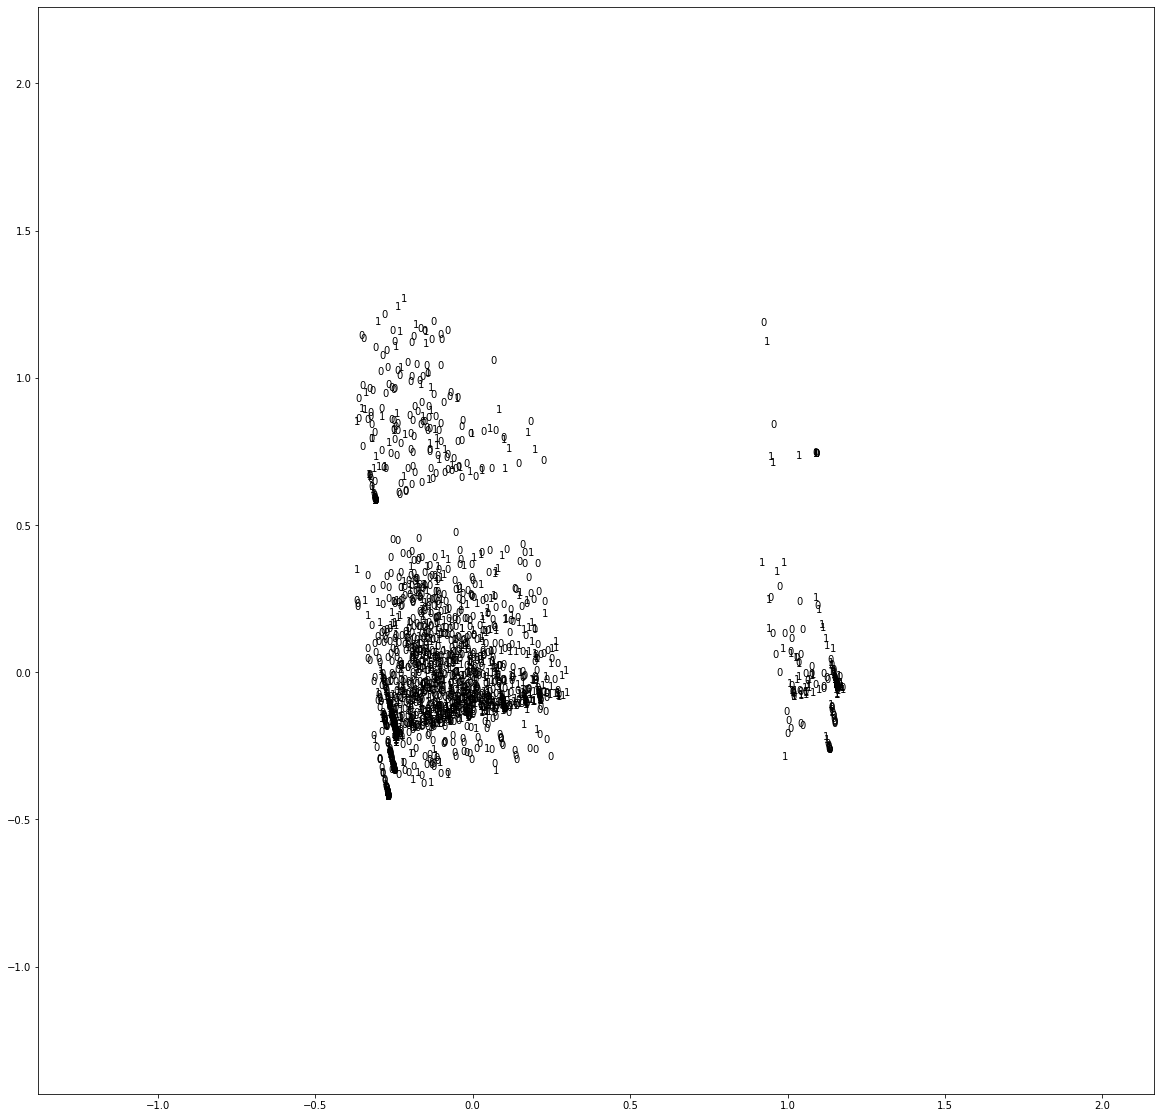

In [270]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 20))
plt.xlim(tt[:, 0].min() - 1, tt[:, 0].max() + 1)
plt.ylim(tt[:, 1].min() - 1, tt[:, 1].max() + 1)

for i in range(tt.shape[0]):
    plt.text(tt[i, 0], tt[i, 1], str(y_train.values[i]))

knn classifier, 신경망, 랜덤 포레스트, SVM 

데이터 분할

knn classifier

이웃 수 그리드 서칭

In [251]:
from sklearn.neighbors import KNeighborsClassifier
best_score = 0
for n in range(1, 200):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train, y_train)
    score = knn.score(x_valid, y_valid)
    if best_score < score:
        best_score = score
        print('best param: ', n, 'score: ', score)

best param:  1 score:  0.554006968641115
best param:  2 score:  0.5958188153310104
best param:  10 score:  0.6167247386759582


In [253]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train.values)
train_score = knn.score(x_train, y_train.values)
valid_score = knn.score(x_valid, y_valid.values)

print(train_score, valid_score)

0.6874515879163439 0.6167247386759582


신경망

In [255]:
from sklearn.neural_network import MLPClassifier

best = 0
for n in range(1, 100):
    mlp = MLPClassifier(learning_rate_init = 0.01, random_state = SEED, max_iter = 1000, hidden_layer_sizes = [n, n])
    mlp.fit(x_train, y_train)
    train_score = mlp.score(x_train, y_train)
    valid_score = mlp.score(x_valid, y_valid)

    if valid_score > best:
        best = valid_score
        print(f'trainscore: {train_score}  validscore: {valid_score}  N = {n}')

trainscore: 0.5886909372579395  validscore: 0.5888501742160279  N = 1
trainscore: 0.632842757552285  validscore: 0.6027874564459931  N = 2
trainscore: 0.6425251742835012  validscore: 0.6167247386759582  N = 3
trainscore: 0.6363284275755229  validscore: 0.6341463414634146  N = 5
trainscore: 0.6371030209140202  validscore: 0.6376306620209059  N = 6
trainscore: 0.6467854376452362  validscore: 0.6445993031358885  N = 9


In [256]:
mlp = MLPClassifier(learning_rate_init = 0.01, random_state = SEED, max_iter = 1000, hidden_layer_sizes = [9, 9])
mlp.fit(x_train, y_train)
train_score = mlp.score(x_train, y_train)
valid_score = mlp.score(x_valid, y_valid)

print(f'trainscore: {train_score}  validscore: {valid_score} ')

trainscore: 0.6467854376452362  validscore: 0.6445993031358885 


트리

In [261]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 1000, random_state = SEED, max_depth=15)
forest.fit(x_train, y_train)
train_score = forest.score(x_train, y_train)
valid_score = forest.score(x_valid, y_valid)

print(f'trainscore: {train_score}  validscore: {valid_score} ')

trainscore: 0.9182804027885361  validscore: 0.6306620209059234 


In [262]:
from sklearn.ensemble import GradientBoostingClassifier
forest = GradientBoostingClassifier(n_estimators = 10, random_state = SEED, max_depth=5, learning_rate=0.05)
forest.fit(x_train, y_train)
train_score = forest.score(x_train, y_train)
valid_score = forest.score(x_valid, y_valid)

print(f'trainscore: {train_score}  validscore: {valid_score} ')

trainscore: 0.6130906274206042  validscore: 0.5853658536585366 


SVM

In [276]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', C=5, gamma = 0.01).fit(x_train, y_train)
svm.score(x_valid, y_valid)

0.6027874564459931

AUC

In [263]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_valid, mlp.predict(x_valid))

0.6176662320730117